In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

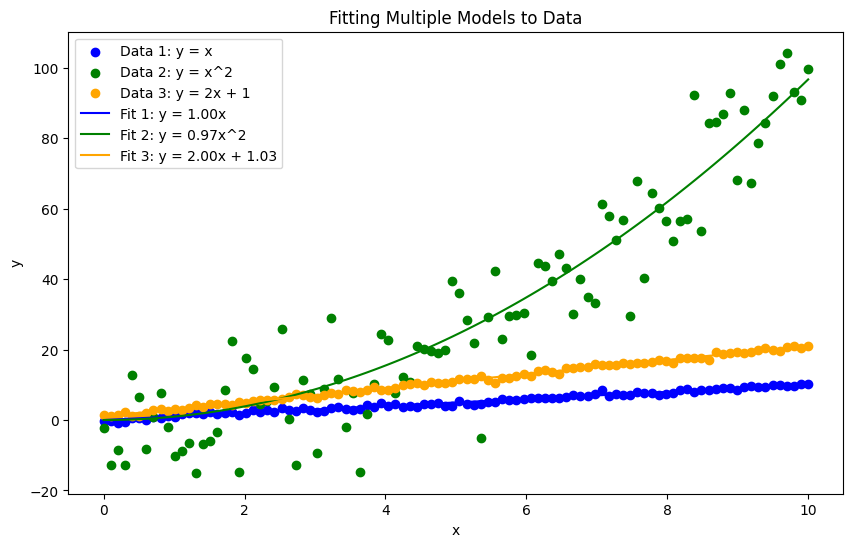

In [4]:
# サンプルデータの生成
x = np.linspace(0, 10, 100)
y1 = x + np.random.normal(0, 0.5, len(x))     # y = x + ノイズ
y2 = x**2 + np.random.normal(0, 10, len(x))   # y = x^2 + ノイズ
y3 = 2*x + 1 + np.random.normal(0, 0.5, len(x)) # y = 2x + 1 + ノイズ

# モデル関数の定義
def model1(x, a):
    return a * x

def model2(x, a):
    return a * x**2

def model3(x, a, b):
    return a * x + b

# 初期推定値の設定
initial_guess1 = [1]      # model1 の初期値
initial_guess2 = [1]      # model2 の初期値
initial_guess3 = [2, 1]   # model3 の初期値

# データにフィット
popt1, pcov1 = curve_fit(model1, x, y1, p0=initial_guess1)
popt2, pcov2 = curve_fit(model2, x, y2, p0=initial_guess2)
popt3, pcov3 = curve_fit(model3, x, y3, p0=initial_guess3)

# フィッティング結果のプロット
plt.figure(figsize=(10, 6))
plt.scatter(x, y1, label='Data 1: y = x', color='blue')
plt.scatter(x, y2, label='Data 2: y = x^2', color='green')
plt.scatter(x, y3, label='Data 3: y = 2x + 1', color='orange')

# フィッティング曲線のプロット
plt.plot(x, model1(x, *popt1), label=f'Fit 1: y = {popt1[0]:.2f}x', color='blue')
plt.plot(x, model2(x, *popt2), label=f'Fit 2: y = {popt2[0]:.2f}x^2', color='green')
plt.plot(x, model3(x, *popt3), label=f'Fit 3: y = {popt3[0]:.2f}x + {popt3[1]:.2f}', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Fitting Multiple Models to Data')
plt.show()